# Edge detection
In clesperanto, multiple filters for edge-detection are implemented.

See also
* [Wikipedia](https://en.wikipedia.org/wiki/Edge_detection)

In [1]:
import pyclesperanto as cle
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

cle.select_device("TX")

(OpenCL) GeForce GT 750M (OpenCL 1.2 )
	Type: GPU
	Compute Units: 2
	Global Memory Size: 2147 MB
	Maximum Object Size: 536 MB

array([[ 40.,  32.,  24., ..., 216., 200., 200.],
       [ 56.,  40.,  24., ..., 232., 216., 216.],
       [ 64.,  48.,  24., ..., 240., 232., 232.],
       ...,
       [ 72.,  80.,  80., ...,  48.,  48.,  48.],
       [ 80.,  80.,  80., ...,  48.,  48.,  48.],
       [ 96.,  88.,  80., ...,  48.,  48.,  48.]], dtype=float32, mtype=buffer)
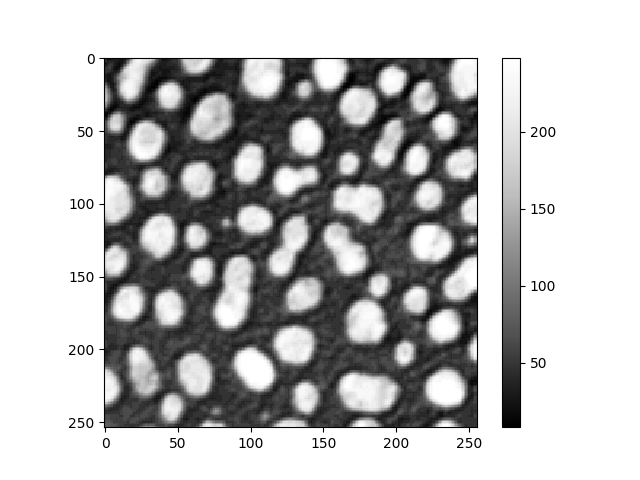
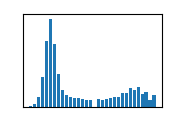

In [2]:
blobs = cle.asarray(imread('https://samples.fiji.sc/blobs.png').squeeze().astype(np.float32))
blobs

## Sobel operator
[see also](https://en.wikipedia.org/wiki/Sobel_operator)

array([[ 68.8186  ,  86.162636,  40.792156, ..., 132.42357 ,  90.50967 ,
         64.      ],
       [104.307236, 132.42357 ,  60.926186, ..., 124.45079 , 132.42357 ,
        128.      ],
       [ 67.88225 , 120.26637 ,  57.68882 , ...,  68.8186  ,  68.8186  ,
         64.      ],
       ...,
       [ 60.926186,  46.647614,  32.      , ...,   0.      ,   0.      ,
          0.      ],
       [ 80.      ,  40.792156,  11.313708, ...,   0.      ,   0.      ,
          0.      ],
       [ 60.926186,  57.68882 ,  25.298222, ...,   0.      ,   0.      ,
          0.      ]], dtype=float32, mtype=buffer)
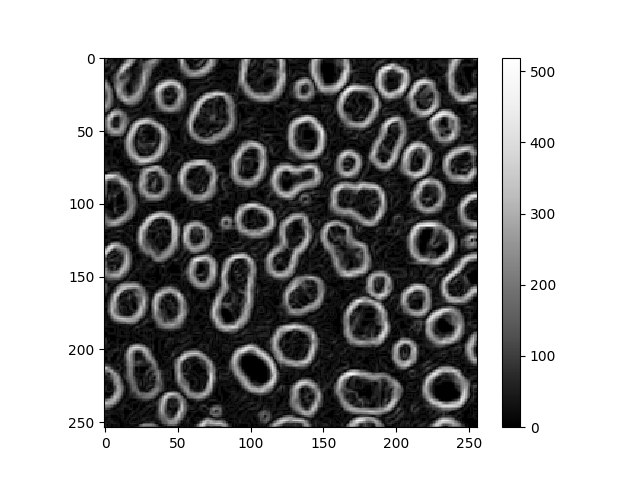
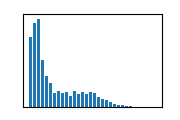

In [3]:
blobs_sobel = cle.sobel(blobs)
blobs_sobel

## Laplace operator
[see also](https://en.wikipedia.org/wiki/Discrete_Laplace_operator)

array([[-16., -24., -32., ..., -40., -96., -48.],
       [ 64.,   8., -56., ...,  40., -40.,   0.],
       [128.,  64., -88., ...,  40.,  16.,  48.],
       ...,
       [-16.,  40.,  24., ...,   0.,   0.,   0.],
       [-24., -16.,  -8., ...,   0.,   0.,   0.],
       [ 64.,  24., -16., ...,   0.,   0.,   0.]], dtype=float32, mtype=buffer)
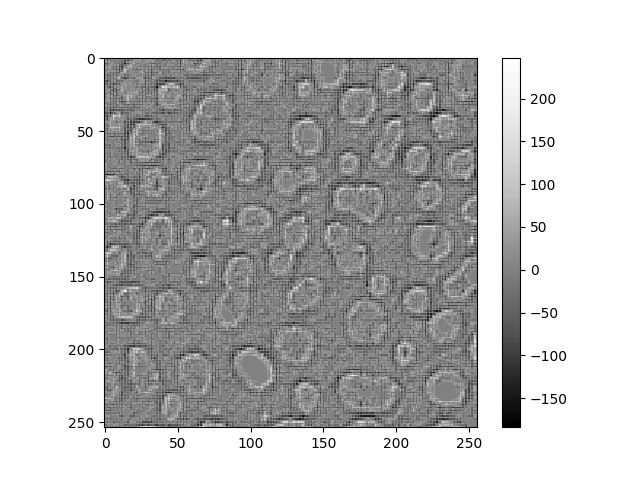
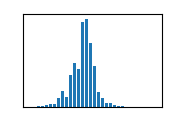

In [4]:
blobs_laplace = cle.laplace_box(blobs)
blobs_laplace

## Laplacian of Gaussian
[Also kown as the Mexican hat filter](https://en.wikipedia.org/wiki/Ricker_wavelet)

array([[ 4.0293159e+00, -1.2073477e+01, -1.8767859e+01, ...,
        -2.4072037e+01, -4.2564713e+01, -4.3117386e+01],
       [ 3.8663559e+01,  7.3365402e+00, -1.4639391e+01, ...,
         1.7005920e-01, -1.1119980e+01, -1.0878952e+01],
       [ 4.8312878e+01,  1.6537041e+01, -9.0019684e+00, ...,
         1.0817459e+01,  5.5904846e+00,  7.3576965e+00],
       ...,
       [-9.9587631e+00,  2.2583466e+00,  8.7143021e+00, ...,
        -3.4637451e-02, -6.5860748e-02, -8.7924957e-02],
       [ 3.1555023e+00,  4.3390274e+00,  6.1774216e+00, ...,
         9.6893311e-04, -2.0751953e-03, -2.7618408e-03],
       [ 2.8555252e+01,  1.4304092e+01,  5.4095917e+00, ...,
         2.7847290e-03,  7.6293945e-06,  7.6293945e-06]], dtype=float32, mtype=buffer)
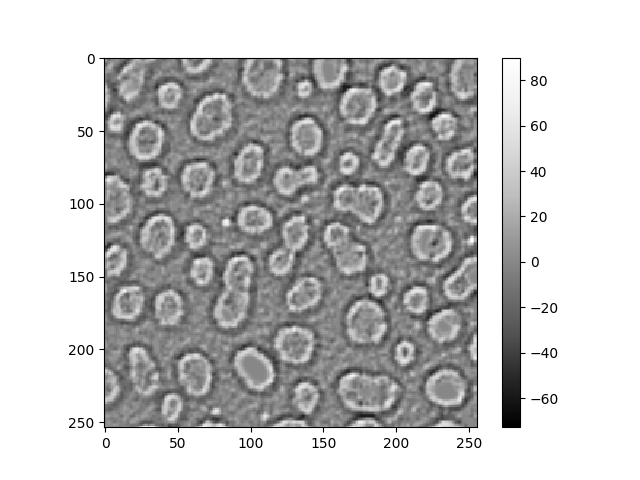
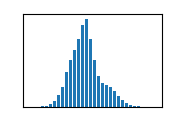

In [5]:
blobs_laplacian_of_gaussian = cle.laplace_box(cle.gaussian_blur(blobs, sigma_x=1, sigma_y=1))
blobs_laplacian_of_gaussian

array([[ 0.7280655 , -2.071373  , -2.7460403 , ..., -2.3329468 ,
        -3.2956238 , -8.296356  ],
       [ 1.8013954 , -0.44896698, -0.79794693, ...,  1.9601135 ,
         1.2943878 , -3.1304169 ],
       [ 1.3617783 , -0.51297   , -0.86735153, ...,  2.0794373 ,
         1.4772186 , -2.5576324 ],
       ...,
       [ 2.9277573 ,  0.15546417,  0.13283539, ..., -1.057312  ,
        -0.7715721 , -1.2407188 ],
       [ 3.7948532 ,  0.5822296 ,  0.5137329 , ..., -1.1534958 ,
        -0.86094284, -1.531414  ],
       [10.268127  ,  6.282089  ,  5.6941986 , ..., -0.45277405,
        -0.5213165 , -1.5948639 ]], dtype=float32, mtype=buffer)
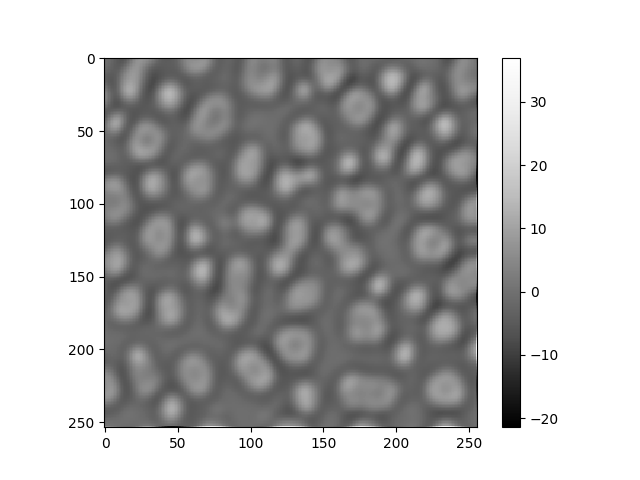
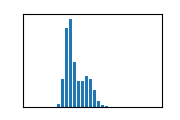

In [6]:
blobs_laplacian_of_gaussian = cle.laplace_box(cle.gaussian_blur(blobs, sigma_x=5, sigma_y=5))
blobs_laplacian_of_gaussian

## Local Variance filter

array([[149.95262  , 140.52817  , 123.987114 , ..., 307.284    ,
        317.07526  , 309.95044  ],
       [152.46176  , 143.42188  , 129.09294  , ..., 270.81003  ,
        283.00604  , 281.8082   ],
       [153.3884   , 144.92552  , 133.23697  , ..., 231.50327  ,
        244.3114   , 246.8117   ],
       ...,
       [170.725    , 162.90894  , 154.44627  , ...,   9.503158 ,
          7.5798054,   8.462815 ],
       [162.2621   , 157.75095  , 153.62428  , ...,   5.813812 ,
          3.0161884,   3.4882884],
       [154.86597  , 152.07706  , 151.35153  , ...,   3.488295 ,
          0.       ,   0.       ]], dtype=float32, mtype=buffer)
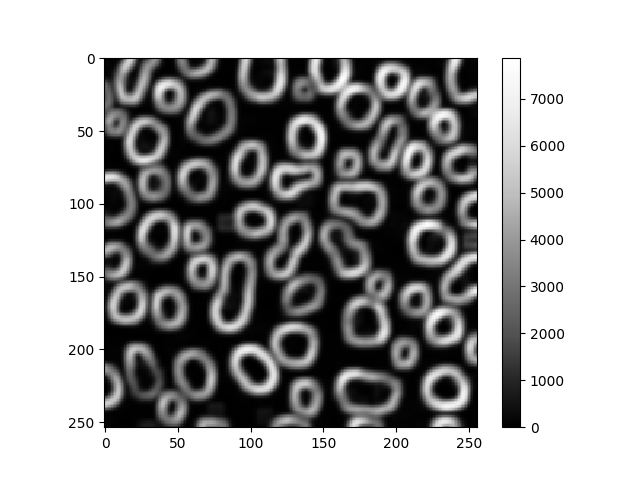
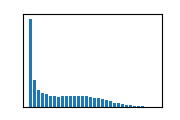

In [7]:
blobs_edges = cle.variance_box(blobs, radius_x=5, radius_y=5)
blobs_edges

# Local standard deviation
... is just the square root of the local variance

In [8]:
blobs_edges = cle.standard_deviation_box(blobs, radius_x=5, radius_y=5)
blobs_edges

AttributeError: module 'pyclesperanto' has no attribute 'standard_deviation_box'

## Edge detection is not edge enhancement
Intuitively, one could apply an edge detection filter to enhance edges in images showing edges. Let's try with an image showing membranes. It's a 3D image btw.

cl.OCLArray([[[ 62.,  90., 110., ...,  64.,  63.,  63.],
        [ 66.,  88., 115., ...,  72.,  57.,  63.],
        [ 60.,  80., 120., ...,  49.,  55.,  46.],
        ...,
        [ 84.,  82.,  61., ...,  39.,  57.,  75.],
        [ 84.,  89.,  68., ...,  52.,  51.,  56.],
        [ 67.,  91.,  67., ...,  50.,  50.,  74.]],

       [[ 70.,  83., 106., ...,  73.,  67.,  65.],
        [ 57.,  97., 112., ...,  74.,  77.,  62.],
        [ 55.,  86., 114., ...,  47.,  56.,  64.],
        ...,
        [110.,  80.,  63., ...,  50.,  47.,  59.],
        [ 98.,  76.,  65., ...,  44.,  57.,  67.],
        [ 88.,  77.,  54., ...,  45.,  55.,  75.]],

       [[ 70.,  84., 109., ...,  55.,  63.,  70.],
        [ 60.,  59., 116., ...,  89.,  60.,  63.],
        [ 55.,  84., 103., ...,  64.,  55.,  59.],
        ...,
        [ 88.,  61.,  56., ...,  38.,  42.,  61.],
        [ 93.,  82.,  45., ...,  40.,  42.,  53.],
        [ 86.,  82.,  55., ...,  40.,  52.,  58.]],

       ...,

       [[ 28.,  36.,  28., ...,  66.,  58.,  58.],
        [ 32.,  39.,  38., ...,  81.,  65.,  58.],
        [ 30.,  34.,  35., ...,  81.,  70.,  79.],
        ...,
        [ 53.,  50.,  62., ...,  43.,  55.,  65.],
        [ 53.,  69.,  65., ...,  49.,  55.,  57.],
        [ 58.,  69.,  72., ...,  44.,  68.,  45.]],

       [[ 34.,  47.,  36., ...,  68.,  63.,  53.],
        [ 37.,  46.,  35., ...,  88.,  78.,  55.],
        [ 33.,  42.,  47., ...,  85.,  66.,  78.],
        ...,
        [ 56.,  56.,  58., ...,  61.,  69.,  68.],
        [ 56.,  58.,  59., ...,  49.,  49.,  56.],
        [ 56.,  74.,  70., ...,  47.,  56.,  63.]],

       [[ 35.,  36.,  33., ...,  63.,  75.,  48.],
        [ 38.,  42.,  39., ...,  81.,  66.,  56.],
        [ 40.,  41.,  41., ...,  90.,  70.,  70.],
        ...,
        [ 45.,  60.,  59., ...,  70.,  59.,  86.],
        [ 51.,  69.,  59., ...,  53.,  65.,  56.],
        [ 65.,  61.,  67., ...,  57.,  54.,  60.]]], dtype=float32)
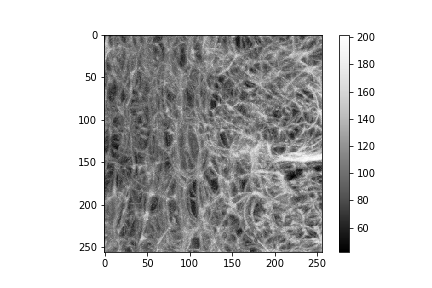
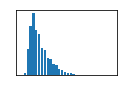

In [9]:
image = cle.asarray(imread("../../data/EM_C_6_c0.tif"))
image

cl.OCLArray([[36., 39., 25., ..., 63., 35., 30.],
       [28., 35., 34., ..., 65., 49., 35.],
       [33., 30., 33., ..., 74., 60., 41.],
       ...,
       [82., 91., 94., ..., 27., 34., 30.],
       [80., 92., 83., ..., 28., 28., 23.],
       [85., 73., 52., ..., 33., 31., 26.]], dtype=float32)
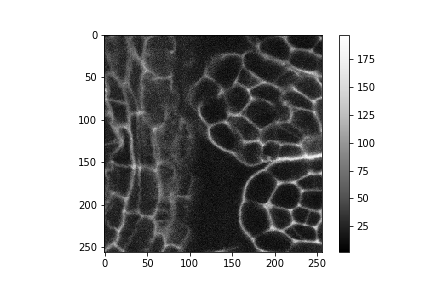
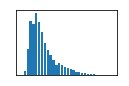

In [10]:
image[60]

cl.OCLArray([[ 467.6377 ,  529.6291 ,  501.43494, ..., 1274.7905 ,  861.8132 ,
         549.9536 ],
       [ 496.90442,  551.1751 ,  555.1315 , ..., 1050.9562 ,  884.59875,
         621.87134],
       [ 521.2945 ,  535.5567 ,  553.9251 , ...,  866.0912 ,  929.78815,
         716.3609 ],
       ...,
       [1257.6001 , 1352.3776 , 1423.3826 , ...,  496.57224,  498.16162,
         445.97534],
       [1323.187  , 1385.4432 , 1415.437  , ...,  526.2984 ,  506.63892,
         406.82553],
       [1587.4546 , 1534.6759 , 1342.625  , ...,  452.37375,  431.55997,
         338.377  ]], dtype=float32)
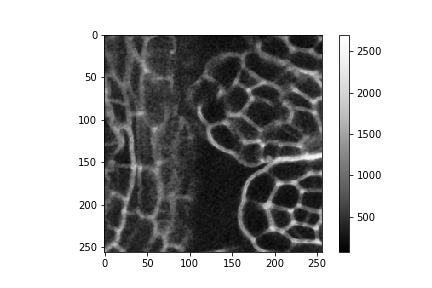
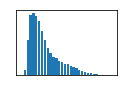

In [11]:
image_sobel = cle.sobel(image)
image_sobel[60]

When looking very carefully, you may observe that the edges are a bit thicker in the second image. The edge detection filter detects two edges, the increasing signal side of the membrane and the decreasing signal on the opposite side. Let's zoom:

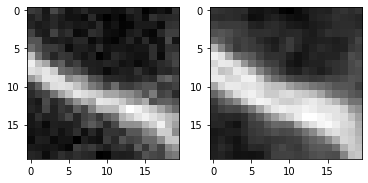

In [12]:
fig, axs = plt.subplots(1, 2)
cle.imshow(                image[60, 125:145, 135:155], plot=axs[0])
cle.imshow(cle.pull(image_sobel)[60, 125:145, 135:155], plot=axs[1])

## Enhancing edges
Thus, to enhance edges in a membrane image, other filters are more useful. Enhancement may for example mean making membranes thicker and potentially closing gaps.

## Local standard deviation

cl.OCLArray([[ 7.2811127,  8.134171 ,  9.307512 , ..., 22.200243 , 22.482307 ,
        22.947567 ],
       [ 7.5273857,  8.278003 ,  9.340383 , ..., 22.438185 , 22.56258  ,
        22.862795 ],
       [ 7.616371 ,  8.273025 ,  9.217965 , ..., 22.246208 , 22.198236 ,
        22.322102 ],
       ...,
       [21.216778 , 21.85669  , 22.474318 , ...,  5.8944054,  6.05584  ,
         6.110779 ],
       [20.41613  , 21.406458 , 22.281708 , ...,  4.99587  ,  5.0696263,
         5.0190578],
       [19.928556 , 21.22558  , 22.26661  , ...,  4.812277 ,  4.8982363,
         4.8279533]], dtype=float32)
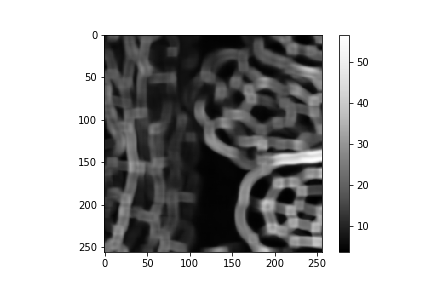
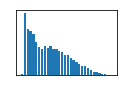

In [13]:
image_std = cle.standard_deviation_box(image, radius_x=5, radius_y=5, radius_z=5)
image_std[60]

## Local maximum

cl.OCLArray([[ 81.,  81.,  81., ..., 116., 116., 116.],
       [ 81.,  81.,  81., ..., 116., 116., 116.],
       [ 81.,  81.,  81., ..., 116., 116., 116.],
       ...,
       [126., 126., 126., ...,  52.,  52.,  52.],
       [126., 126., 126., ...,  44.,  44.,  44.],
       [126., 126., 126., ...,  44.,  44.,  44.]], dtype=float32)
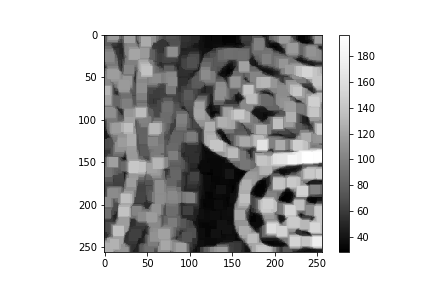
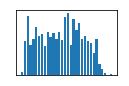

In [14]:
image_max = cle.maximum_box(image, radius_x=5, radius_y=5, radius_z=5)
image_max[60]